#Read in All

In [0]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

In [0]:
# !ls "/content/drive"
import os
CHI_Folder = '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Analysis'
data_fpath = lambda fname: os.path.join(CHI_Folder, fname)
Data_path = "merged.csv"

#Read in CSV
df = pd.read_csv(data_fpath(Data_path))

In [0]:
df.head(n=2)

,sessID,num_play,feedback (feeback_lv01_logtransform_z3pca2k7),goals (achs_achs_per_sess_second_sessDur_logtransform_z3pca2k6),actions (actions_lvl01_logtransform_z3pca2k6)
0,19110002150060536,1,6,0,2
1,19110002291618864,1,2,2,0


#Evaluate Clusters

Info about Rand Index: https://scikit-learn.org/stable/modules/clustering.html 

In [0]:
#Actions Vs Achievements
from sklearn import metrics
labels_true = df['actions (actions_lvl01_logtransform_z3pca2k6)']
labels_pred = df['goals (achs_achs_per_sess_second_sessDur_logtransform_z3pca2k6)']

metrics.adjusted_rand_score(labels_pred=labels_pred, labels_true=labels_true)

0.0220491098215644

In [0]:
#Actions Vs. Feedback
labels_true = df['actions (actions_lvl01_logtransform_z3pca2k6)']
labels_pred = df['feedback (feeback_lv01_logtransform_z3pca2k7)']

metrics.adjusted_rand_score(labels_pred=labels_pred, labels_true=labels_true)

0.06540909797116859

In [0]:
#Achievements Vs. Feedback
labels_true = df['feedback (feeback_lv01_logtransform_z3pca2k7)']
labels_pred = df['goals (achs_achs_per_sess_second_sessDur_logtransform_z3pca2k6)']

metrics.adjusted_rand_score(labels_pred=labels_pred, labels_true=labels_true)

0.060910570630779204

In [0]:

labels_true = df['feedback (feeback_lv01_logtransform_z3pca2k7)']
labels_pred = df['goals (achs_achs_per_sess_second_sessDur_logtransform_z3pca2k6)']


metrics.adjusted_mutual_info_score(labels_pred, labels_true)

0.0954363449833194

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1350: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/

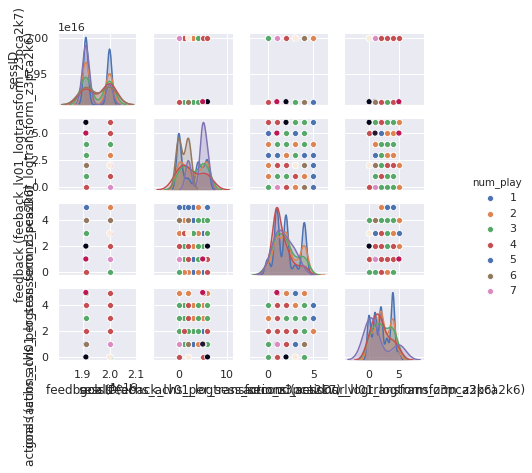

In [0]:
#Visualize Cluser Distribution
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df, hue='num_play', size=1.5);